In [4]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
from src.my_app import PreTrainDataset
from src.my_app.core.MyDataset.NewMyDataset import PreTrainDataset_new
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

In [ ]:
# データセットの設定
test_doc_id_list = ['100241706', '100249371', '100249376', '100249416', '100249476', '100249537', '200003076', '200003803', '200003967', '200004107']
transform = transforms.Compose([
    transforms.ToTensor()
])

# データセットの作成
dataset = PreTrainDataset(
    input_path='../../kuzushiji-recognition/synthetic_images/input_images/',
    json_path='../../kuzushiji-recognition/synthetic_images/gt_json.json',
    test_doc_id_list=test_doc_id_list,
    test_mode=False,
    device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    precompute_gt=False,
    transform=transform,
    target_width=400  # 横幅を400ピクセルに固定
)

NameError: name 'transforms' is not defined

In [5]:
# データセットの設定
test_doc_id_list = ['100241706', '100249371', '100249376', '100249416', '100249476', '100249537', '200003076', '200003803', '200003967', '200004107']
transform = transforms.Compose([
    transforms.ToTensor()
])

# データセットの作成
dataset = PreTrainDataset_new(
    input_path='../../kuzushiji-recognition/synthetic_images/input_images/',
    json_path='../../kuzushiji-recognition/synthetic_images/gt_json.json',
    test_doc_id_list=test_doc_id_list,
    test_mode=False,
    device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    precompute_gt=False,
    transform=transform,
    target_width=400  # 横幅を400ピクセルに固定
)

Using device: cuda
jsonデータを読み込みました。


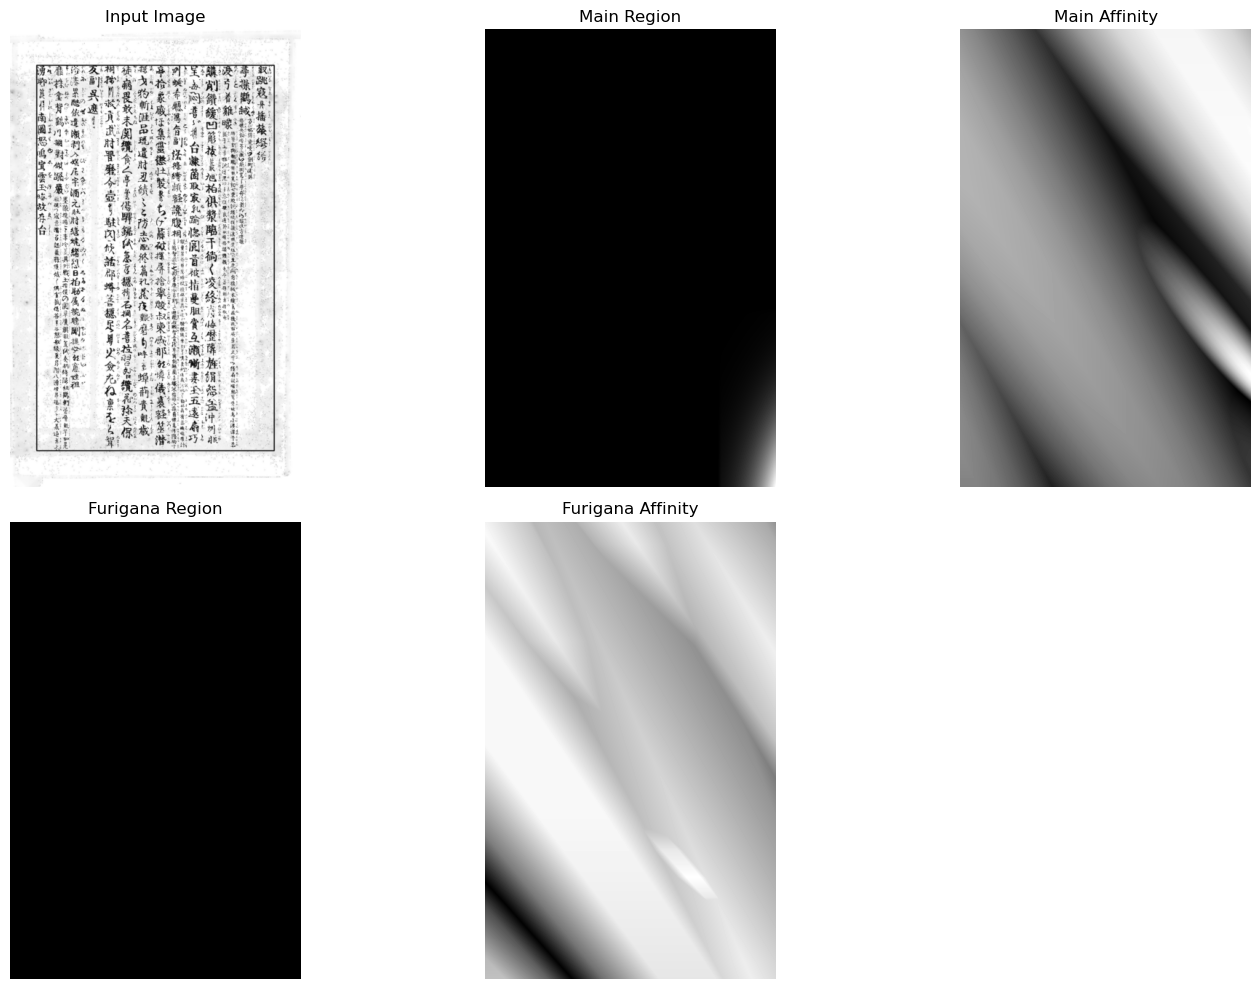

In [6]:
# インデックス0の画像とその正解データを取得
image, tensor_gt = dataset[0]

# 画像の表示
plt.figure(figsize=(15, 10))

# 元の画像を表示
plt.subplot(2, 3, 1)
plt.title('Input Image')
plt.imshow(image.permute(1, 2, 0))  # CHW -> HWC
plt.axis('off')

# 正解データの各チャネルを表示
channel_names = ['Main Region', 'Main Affinity', 'Furigana Region', 'Furigana Affinity']
for i, name in enumerate(channel_names):
    plt.subplot(2, 3, i + 2)
    plt.title(name)
    plt.imshow(tensor_gt[i].cpu().numpy(), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

表示される内容の説明：
1. Input Image: 入力画像
2. Main Region: 本文文字の領域
3. Main Affinity: 本文文字間の関連性
4. Furigana Region: ふりがなの領域
5. Furigana Affinity: ふりがな間の関連性

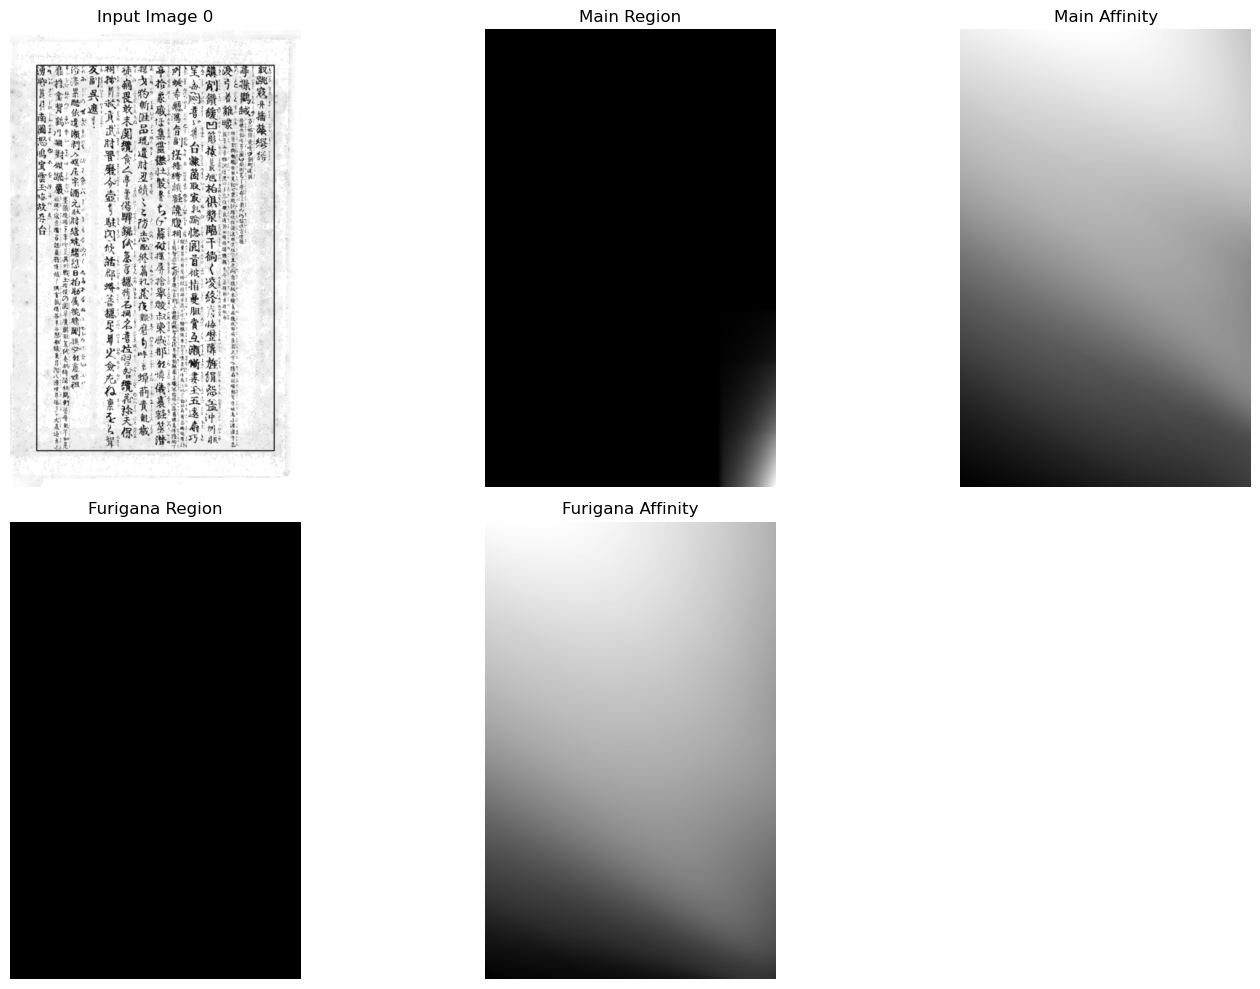

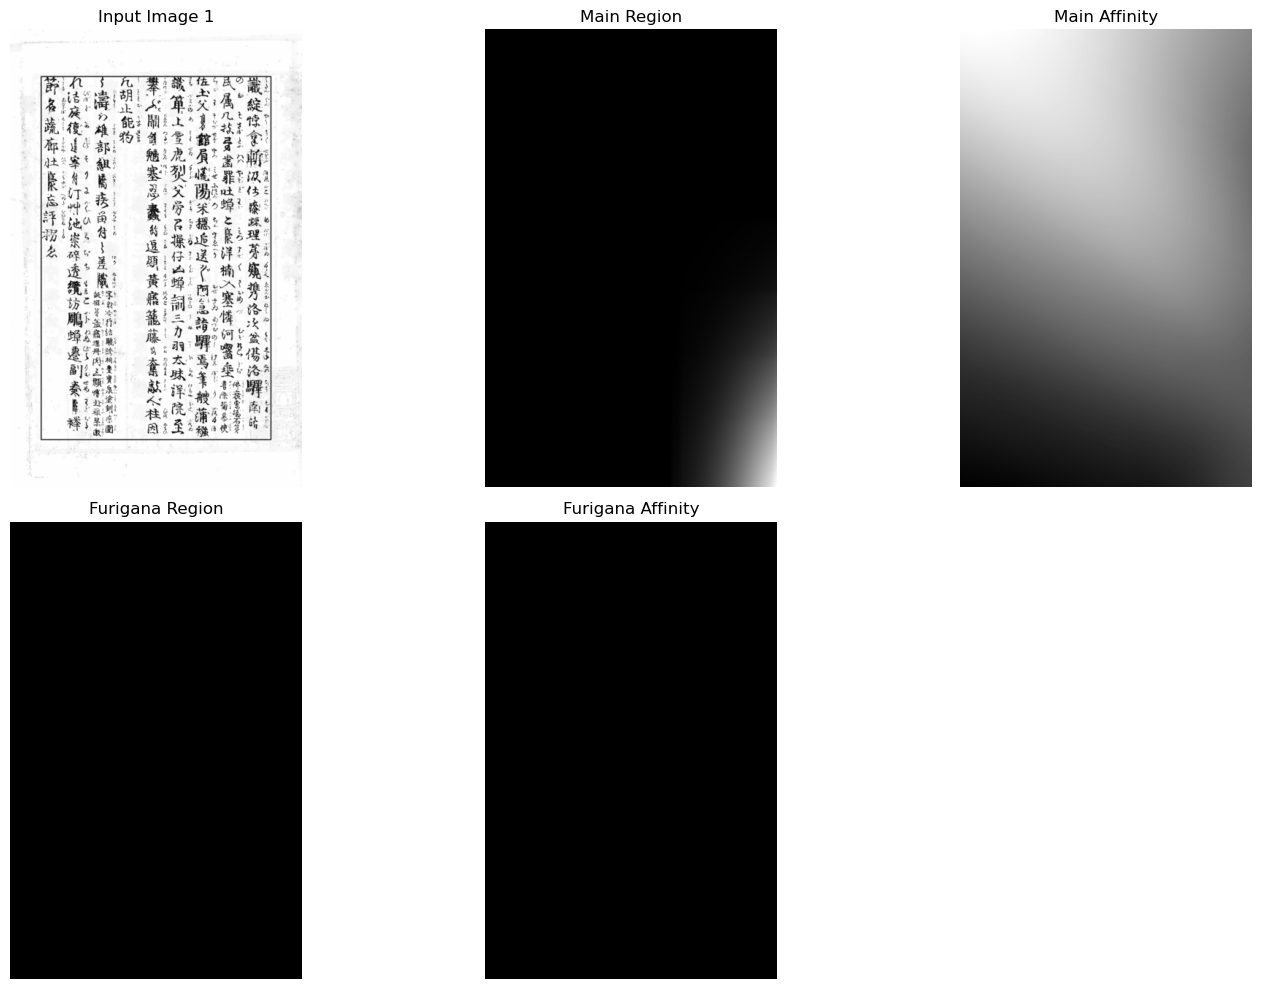

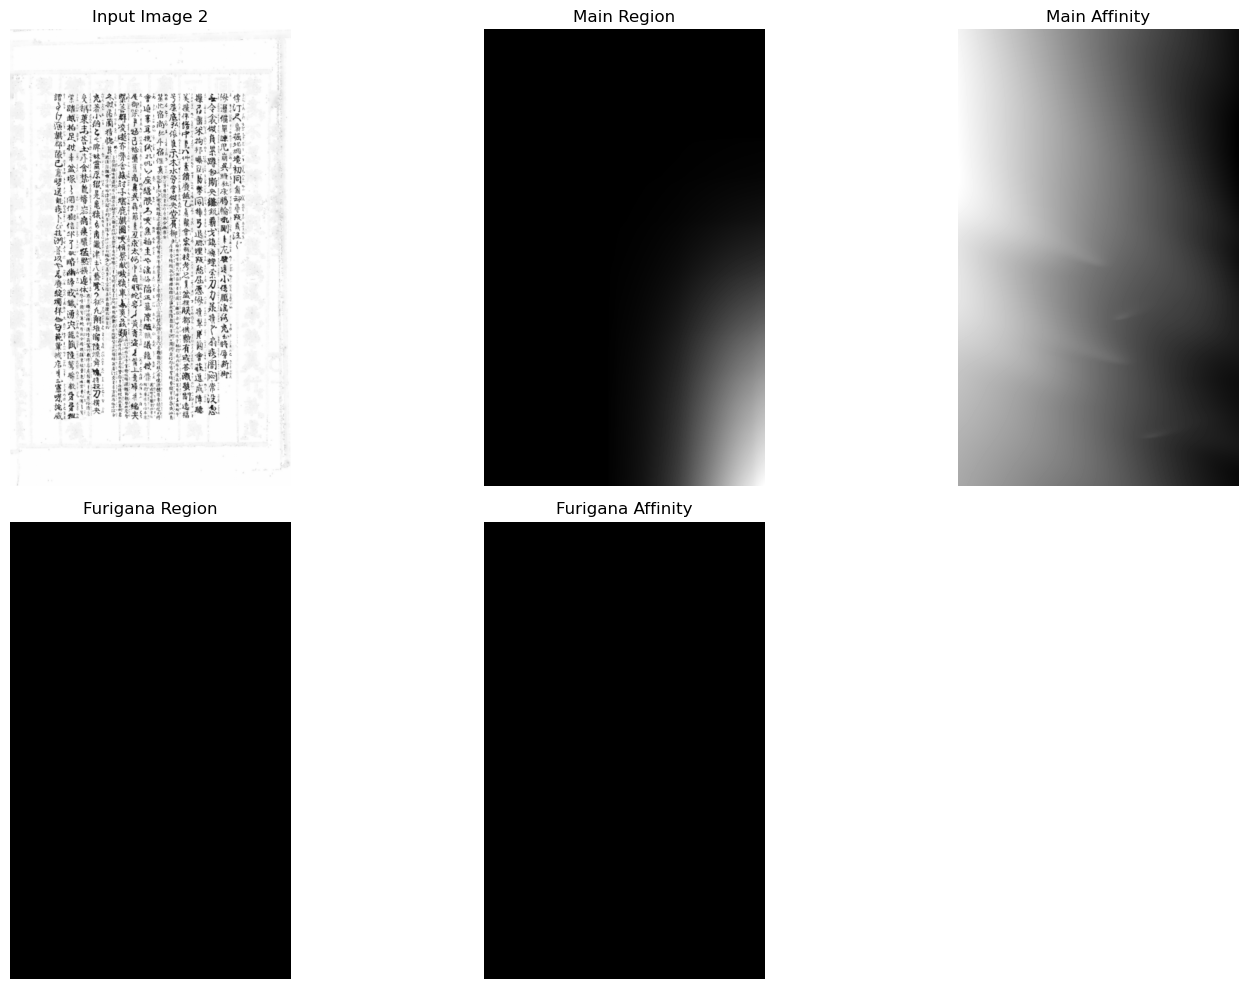

In [4]:
# 複数の画像をループで表示
num_samples = 3  # 表示する画像の数

for idx in range(num_samples):
    image, tensor_gt = dataset[idx]
    
    plt.figure(figsize=(15, 10))
    
    # 元の画像を表示
    plt.subplot(2, 3, 1)
    plt.title(f'Input Image {idx}')
    plt.imshow(image.permute(1, 2, 0))
    plt.axis('off')
    
    # 正解データの各チャネルを表示
    for i, name in enumerate(channel_names):
        plt.subplot(2, 3, i + 2)
        plt.title(name)
        plt.imshow(tensor_gt[i].cpu().numpy(), cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()